In [2]:
import pandas as pd
import numpy as np
from numpy import array
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
import statsmodels.stats.multicomp as mc
from pandas import DataFrame
import scikit_posthocs as sp

In [15]:
suicide_global = pd.read_csv("C:/Users/vicki/iCloudDrive/Desktop/U of T/Master 1/winter2020/inf2178/project/master.csv")

In [16]:
suicide = suicide_global[suicide_global.country=="Canada"]

In [25]:
suicide

,country,year,sex,age,suicides_no,population,suicides_rate,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4916,Canada,1985,male,75+ years,111,390200,28.45,Canada1985,0.827,"364,756,499,451",15522,G.I. Generation
4917,Canada,1985,male,55-74 years,502,1841000,27.27,Canada1985,0.827,"364,756,499,451",15522,G.I. Generation
4918,Canada,1985,male,25-34 years,605,2240500,27.00,Canada1985,0.827,"364,756,499,451",15522,Boomers
4919,Canada,1985,male,35-54 years,774,3046800,25.40,Canada1985,0.827,"364,756,499,451",15522,Silent
4920,Canada,1985,male,15-24 years,560,2224600,25.17,Canada1985,0.827,"364,756,499,451",15522,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
5259,Canada,2013,female,15-24 years,138,2261173,6.10,Canada2013,0.912,"1,842,628,005,830",55310,Millenials
5260,Canada,2013,female,25-34 years,135,2433660,5.55,Canada2013,0.912,"1,842,628,005,830",55310,Millenials
5261,Canada,2013,female,75+ years,65,1410630,4.61,Canada2013,0.912,"1,842,628,005,830",55310,Silent
5262,Canada,2013,female,5-14 years,20,1823010,1.10,Canada2013,0.912,"1,842,628,005,830",55310,Generation Z


# Descriptive Statistics

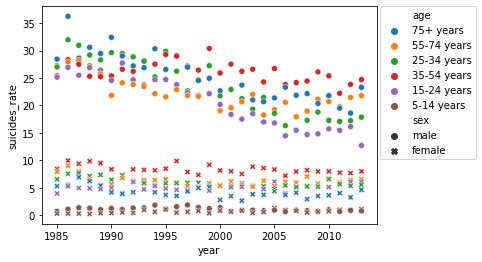

In [18]:
sns.scatterplot(y="suicides_rate", x="year", hue="age", style="sex", data=suicide)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [19]:
sr = suicide[["age", "sex", "suicides_rate"]]
sr.groupby(["sex", "age"]).describe()

suicides_rate                                            \
                           count       mean       std    min    25%    50%   
sex    age                                                                   
female 15-24 years          29.0   5.115862  0.621700   3.95   4.74   5.13   
       25-34 years          29.0   5.929310  0.822036   4.39   5.35   5.79   
       35-54 years          29.0   8.362069  0.760950   7.21   7.95   8.20   
       5-14 years           29.0   0.647586  0.286900   0.23   0.40   0.62   
       55-74 years          29.0   6.321379  0.899237   5.19   5.66   6.22   
       75+ years            29.0   4.302759  1.069602   2.66   3.64   4.10   
male   15-24 years          29.0  20.658276  4.682785  12.70  16.15  21.86   
       25-34 years          29.0  23.600000  5.118762  16.30  18.56  22.91   
       35-54 years          29.0  26.203448  1.835439  22.21  25.25  26.22   
       5-14 years           29.0   1.077586  0.334009   0.65   0.82   1.02   
       55-74 years          29.0  22.170345  2.847242  17.93  20.58  21.78   
       75+ years            29.0  25.222414  4.404716  18.61  21.79  24.54   

                                  
                      75%    max  
sex    age                        
female 15-24 years   5.37   6.11  
       25-34 years   6.45   7.68  
       35-54 years   8.58   9.94  
       5-14 years    0.85   1.28  
       55-74 years   6.56   9.03  
       75+ years     4.98   6.92  
male   15-24 years  24.70  27.73  
       25-34 years  28.31  31.97  
       35-54 years  27.49  30.40  
       5-14 years    1.30   1.87  
       55-74 years  23.45  28.20  
       75+ years    28.63  36.26

# ANOVA

In [20]:
suicide[['year']] = suicide[['year']].astype("category")
suicide.dtypes

C:\Users\vicki\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


country                 object
year                  category
sex                     object
age                     object
suicides_no              int64
population               int64
suicides_rate          float64
country-year            object
HDI for year           float64
 gdp_for_year ($)       object
gdp_per_capita ($)       int64
generation              object
dtype: object

In [21]:
my_model = smf.ols(formula='suicides_rate ~ year + age + sex + year:sex + year:age + sex:age', data=suicide)
my_model_fit = my_model.fit()
sm.stats.anova_lm(my_model_fit, typ=2)

,sum_sq,df,F,PR(>F)
year,844.652556,28.0,10.291451,3.502441e-22
age,9961.134138,5.0,679.665664,2.771448e-96
sex,18822.474815,1.0,6421.452446,7.441847e-119
year:sex,567.553902,28.0,6.915214,2.056542e-15
year:age,495.693279,140.0,1.207929,1.324740e-01
sex:age,3814.073971,5.0,260.240961,5.106397e-69
Residual,410.366112,140.0,NaN,NaN


From this table, we can see that all of our main effect, year, age and sex are statistically significant. Our interaction effect between year and age is not significant, so we will not continue to look at the three-way interactions. But our anova table does not tell us which group pairs are different in means. We need to perform post hoc test to further look at the details.

# Post Hoc Test

C:\Users\vicki\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1985 : female,1985 : male,16.92,0.0483,0.0435,33.7965,True
1985 : female,1986 : female,0.8567,0.9,-16.0198,17.7331,False
1985 : female,1986 : male,20.005,0.0025,3.1285,36.8815,True
1985 : female,1987 : female,0.785,0.9,-16.0915,17.6615,False
1985 : female,1987 : male,18.28,0.0143,1.4035,35.1565,True
1985 : female,1988 : female,0.3933,0.9,-16.4831,17.2698,False
1985 : female,1988 : male,18.0133,0.0184,1.1369,34.8898,True
1985 : female,1989 : female,0.38,0.9,-16.4965,17.2565,False
1985 : female,1989 : male,17.2933,0.0352,0.4169,34.1698,True
1985 : female,1990 : female,-0.415,0.9,-17.2915,16.4615,False


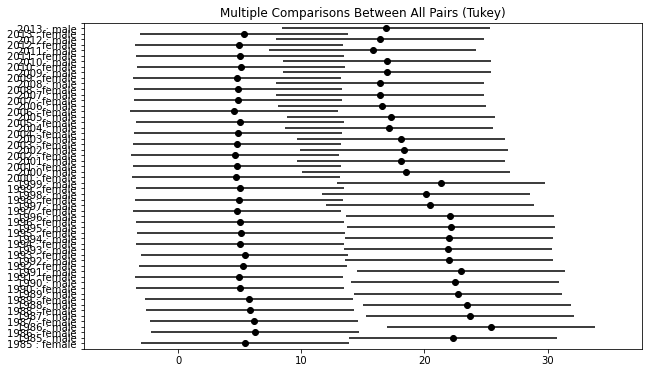

In [22]:
interaction_groups = suicide.year.astype(str) + " : "  + suicide.sex.astype(str)
comp = mc.MultiComparison(suicide["suicides_rate"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
female : 15-24 years,female : 25-34 years,0.8134,0.9,-1.457,3.0839,False
female : 15-24 years,female : 35-54 years,3.2462,0.001,0.9758,5.5166,True
female : 15-24 years,female : 5-14 years,-4.4683,0.001,-6.7387,-2.1979,True
female : 15-24 years,female : 55-74 years,1.2055,0.825,-1.0649,3.4759,False
female : 15-24 years,female : 75+ years,-0.8131,0.9,-3.0835,1.4573,False
female : 15-24 years,male : 15-24 years,15.5424,0.001,13.272,17.8128,True
female : 15-24 years,male : 25-34 years,18.4841,0.001,16.2137,20.7545,True
female : 15-24 years,male : 35-54 years,21.0876,0.001,18.8172,23.358,True
female : 15-24 years,male : 5-14 years,-4.0383,0.001,-6.3087,-1.7679,True
female : 15-24 years,male : 55-74 years,17.0545,0.001,14.7841,19.3249,True


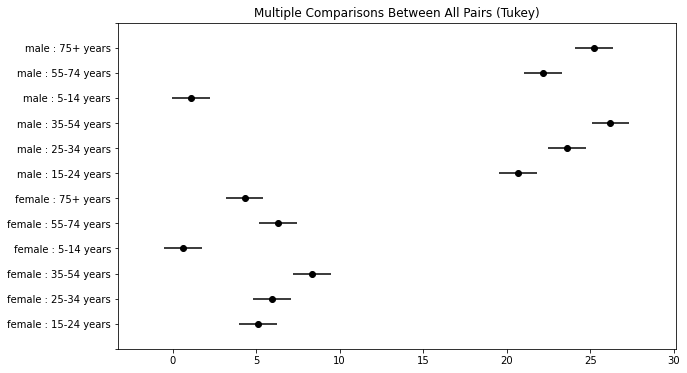

In [23]:
interaction_groups2 = suicide.sex.astype(str) + " : "  + suicide.age.astype(str)
comp = mc.MultiComparison(suicide["suicides_rate"], interaction_groups2)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.plot_simultaneous()
post_hoc_res.summary()

In [20]:
sp.posthoc_ttest(suicide, val_col='suicides_rate', group_col='age', p_adjust='holm')

,75+ years,55-74 years,25-34 years,35-54 years,15-24 years,5-14 years
75+ years,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.601195e-15
55-74 years,1.000000e+00,1.000000e+00,1.000000e+00,5.627642e-01,1.000000e+00,1.508196e-21
25-34 years,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.733451e-18
35-54 years,1.000000e+00,5.627642e-01,1.000000e+00,1.000000e+00,8.310081e-02,1.021440e-24
15-24 years,1.000000e+00,1.000000e+00,1.000000e+00,8.310081e-02,1.000000e+00,5.850309e-18
5-14 years,2.601195e-15,1.508196e-21,1.733451e-18,1.021440e-24,5.850309e-18,1.000000e+00
